In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import ast

## Run-1 (R_0 = 5e-3)

### Load Recording Files

In [2]:
recordings_file = '../data/2022-02-16 20 rate = 0.005/recordings epsilon= 0.0001learning_rate = 0.005spike freq = 10'
recordings = pd.read_pickle(recordings_file)
print(type(recordings))
spk_rec, weight_update_rec, weight_change_rec, weight_rec, r_ij_rec, v_ij_rec, g_ij2_rec = recordings

loss_rec_file = '../data/2022-02-16 20 rate = 0.005/loss_rec epsilon= 0.0001learning_rate = 0.005spike freq = 10'
loss_rec = pd.read_pickle(loss_rec_file).flatten()

<class 'tuple'>


In [3]:
# Get args
args_filename = '../data/2022-02-16 20 rate = 0.005/args epsilon = 0.0001learning_rate = 0.005spike freq = 10'
args_file = open(args_filename, 'r')
args = args_file.read()
#args = ast.literal_eval(args)
print(args)
print(type(args))

#nb_epochs = args['nb_epochs']


{'thres': -50, 'u_rest': -60, 'tau_mem': 0.01, 'tau_syn': 0.005, 'tau_ref': 0.005, 't_rise': 0.005, 't_decay': 0.01, 'timestep_size': 0.0001, 't_rise_alpha': 0.005, 't_decay_alpha': 0.01, 'nb_steps': 5000, 'tau_rms': 0.0005, 'nb_inputs': 100, 'nb_outputs': 1, 'device': device(type='cpu'), 'dtype': torch.float32, 'nb_epochs': 800, 'epsilon': 0.0001, 'alpha': 0.9801986733067553, 'beta': 0.9900498337491681}
<class 'str'>


### Loss Plot

Text(0.5, 0, 'Epoch')

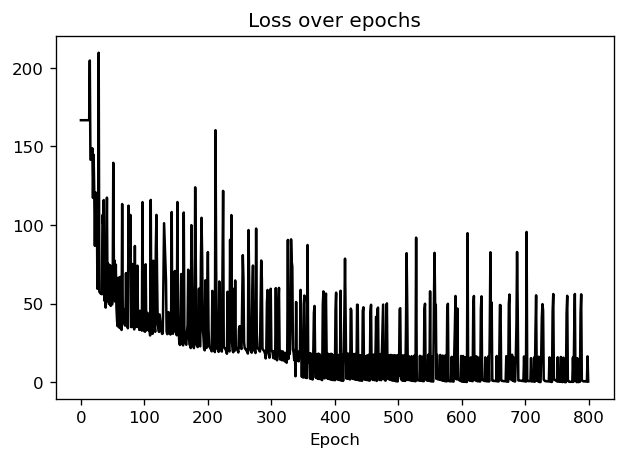

In [16]:
plt.figure(dpi=120)
plt.plot(loss_rec.flatten(), color='black')
plt.title("Loss over epochs")
plt.xlabel("Epoch")

### Overshoot Indices

In [54]:
# Isolate indices where loss jumps:

overshoot_indices = []
for i in range(800 - 1):
    # if loss_rec[i] <= 0.1*loss_rec[i+1]:
    if loss_rec[i] < 5 and loss_rec[i+1] >= 30:

        overshoot_indices.append(i)

overshoot_indices = np.array(overshoot_indices)
print(overshoot_indices)
print(len(overshoot_indices))

[338 350 356 380 384 400 408 424 434 443 455 466 480 501 511 527 540 549
 555 576 592 608 617 629 643 673 701 715 742 764 776 786]
32


In [34]:
print(loss_rec[338])
print(loss_rec[339])

3.8513123989105225
51.099369049072266


In [87]:
loss_overshoot = np.empty_like(overshoot_indices, dtype=float)
for idx, overshoot_indice in enumerate(overshoot_indices):
    loss_overshoot[idx] = loss_rec[overshoot_indice + 1] - loss_rec[overshoot_indice]
    #print(loss_overshoot[idx])

loss_overshoot = np.column_stack((overshoot_indices, loss_overshoot))
print(loss_overshoot)

[[338.          47.24805665]
 [350.          46.56846118]
 [356.          84.59765768]
 [380.          48.12478232]
 [384.          47.58930826]
 [395.          16.08442569]
 [397.          15.12272143]
 [400.          44.63777626]
 [405.          15.7578094 ]
 [408.          56.80726504]
 [411.          16.62772465]
 [413.          16.40894699]
 [424.          45.01912594]
 [432.          16.25680733]
 [434.          47.71958351]
 [438.          16.04330111]
 [440.          15.71001792]
 [443.          44.53289032]
 [450.          15.69029689]
 [453.          16.38629532]
 [455.          43.56864107]
 [460.          16.17232537]
 [463.          16.83882451]
 [466.          45.3892045 ]
 [471.          16.518543  ]
 [473.          15.80689716]
 [480.          48.03720951]
 [487.          15.83229554]
 [490.          15.97833753]
 [493.          16.27254987]
 [496.          16.37589157]
 [499.          16.83159202]
 [501.          42.45796347]
 [506.          16.0488168 ]
 [509.        

### Weight Update Norm

torch.Size([800, 100, 1])
(800, 1)


Text(0.5, 0, 'Epochs')

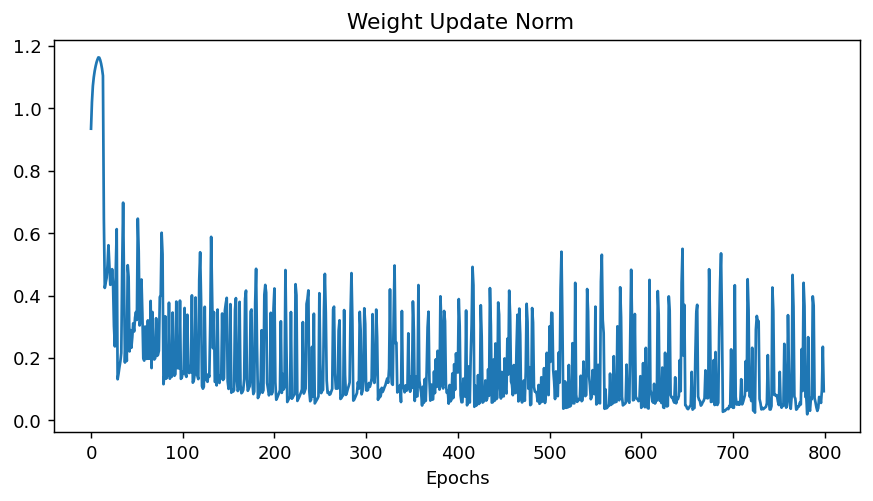

In [54]:
print(weight_change_rec.shape)
#norm = np.zero()
norm = np.linalg.norm(weight_change_rec, axis=1)
print(norm.shape)
plt.figure(dpi = 130, figsize=(8,4))
plt.plot(norm)
plt.title(" Weight Update Norm")
plt.xlabel("Epochs")

In [71]:
# Avg norm at overshoot indices:
print(norm[overshoot_indices].shape)
overshoot_norm = np.mean(norm[overshoot_indices])
print("Average weight update norm before overshoot", overshoot_norm)

# Avg norm of weight updates overall
avg_norm = np.mean(norm)
print("Overall average weight update norm", avg_norm)


(91, 1)
Average weight update norm before overshoot 0.0679064
Overall average weight update norm 0.18826942


### Spike Train Change

torch.Size([800, 5000])


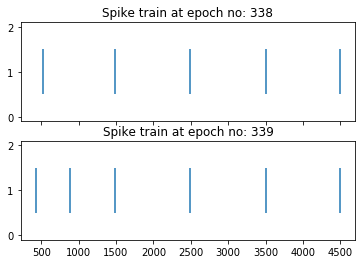

In [17]:
print(spk_rec.shape)

def juxtapose_spk_trains(i, j, spk_rec):
    """ Plot two spike trains at given two epochs."""

    fig, axs = plt.subplots(2, 1, sharex=True)

    positions = np.arange(0, 5000)
    spike_positions = positions[spk_rec[i] == 1]
    # plt.figure()
    axs[0].eventplot(spike_positions)
    axs[0].set_title("Spike train at epoch no: " + str(i))

    spike_positions = positions[spk_rec[j] == 1]
    # plt.figure(dpi=100)
    axs[1].eventplot(spike_positions)
    axs[1].set_title("Spike train at epoch no: " + str(j))

juxtapose_spk_trains(338, 339, spk_rec)

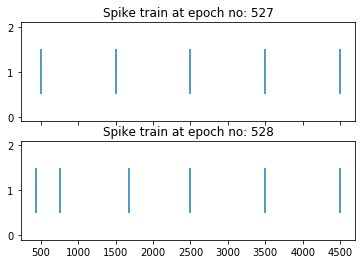

In [19]:
juxtapose_spk_trains(527, 528, spk_rec)

## Run-2 (R_0 = 10e-3)

In [5]:
recordings_file_2 = '../data/2022-02-17 00 rate = 0.01/recordings epsilon= 0.0001learning_rate = 0.01spike freq = 10'
recordings_2 = pd.read_pickle(recordings_file_2)
print(type(recordings_2))
spk_rec_2, weight_update_rec_2, weight_change_rec_2, weight_rec_2, r_ij_rec_2, v_ij_rec_2, g_ij2_rec_2 = recordings_2

loss_rec_file_2 = '../data/2022-02-17 00 rate = 0.01/loss_rec epsilon= 0.0001learning_rate = 0.01spike freq = 10'
loss_rec_2 = pd.read_pickle(loss_rec_file_2).flatten()
print(loss_rec_2.shape)

<class 'tuple'>
(1000,)


In [4]:
# Get args
args_filename_2 = '../data/2022-02-17 00 rate = 0.01/args epsilon = 0.0001learning_rate = 0.01spike freq = 10'
args_file_2 = open(args_filename_2, 'r')
args_2 = args_file_2.read()
#args = ast.literal_eval(args)
print(args_2)
print(type(args_2))

#nb_epochs = args['nb_epochs']

{'thres': -50, 'u_rest': -60, 'tau_mem': 0.01, 'tau_syn': 0.005, 'tau_ref': 0.005, 't_rise': 0.005, 't_decay': 0.01, 'timestep_size': 0.0001, 't_rise_alpha': 0.005, 't_decay_alpha': 0.01, 'nb_steps': 5000, 'tau_rms': 0.0005, 'nb_inputs': 100, 'nb_outputs': 1, 'device': device(type='cpu'), 'dtype': torch.float32, 'nb_epochs': 1000, 'epsilon': 0.0001, 'alpha': 0.9801986733067553, 'beta': 0.9900498337491681}
<class 'str'>


### Loss Plot

Text(0.5, 0, 'Epoch')

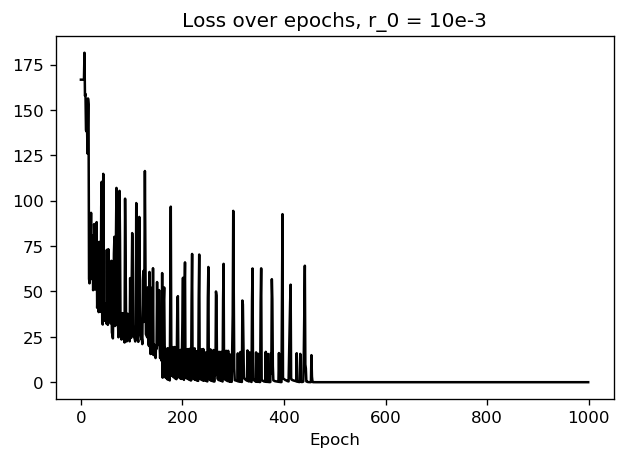

In [22]:
plt.figure(dpi=120)
plt.plot(loss_rec_2.flatten(), color='black')
plt.title("Loss over epochs, r_0 = 10e-3")
plt.xlabel("Epoch")

### Overshoot Inidices

In [10]:
# Isolate indices where loss jumps:
# i.e. indices the weight updates at which lead to a jump in the loss at the next indice
overshoot_indices_2 = []
for i in range(800 - 1):
    # if loss_rec_2[i] <= 0.1*loss_rec_2[i+1]:
    if loss_rec_2[i] < 5 and loss_rec_2[i+1] >= 30:
        overshoot_indices_2.append(i)

overshoot_indices_2 = np.array(overshoot_indices_2)
print("Overshoot indices:", overshoot_indices_2)
print(len(overshoot_indices_2))

Overshoot indices: [175 203 217 231 249 265 279 317 336 353 375 395]
12


In [16]:
print(loss_rec_2[375])
print(loss_rec_2[376])

4.939548015594482
56.76714324951172


In [11]:
loss_overshoot_2 = np.empty_like(overshoot_indices_2, dtype=float)
for idx, overshoot_indice in enumerate(overshoot_indices_2):
    loss_overshoot_2[idx] = loss_rec_2[overshoot_indice + 1] - loss_rec_2[overshoot_indice]
    #print(loss_overshoot[idx])

loss_overshoot_2 = np.column_stack((overshoot_indices_2, loss_overshoot_2))
print(loss_overshoot_2)

[[175.          45.86434382]
 [203.          45.99106872]
 [217.          44.40194589]
 [231.          45.44636476]
 [249.          46.21186841]
 [265.          46.03733611]
 [279.          45.24815896]
 [317.          44.86518835]
 [336.          45.06024536]
 [353.          44.43738075]
 [375.          51.82759523]
 [395.          43.52278858]]


### Weight Change Norm

torch.Size([1000, 100, 1])
(1000, 1)


Text(0.5, 0, 'Epochs')

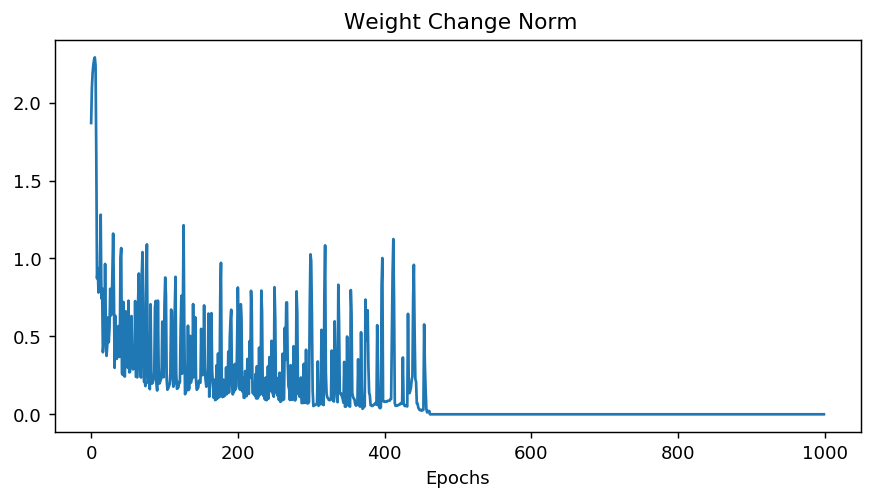

In [6]:
print(weight_change_rec_2.shape)
#norm = np.zero()
norm_2 = np.linalg.norm(weight_change_rec_2, axis=1)
print(norm_2.shape)
plt.figure(dpi = 130, figsize=(8,4))
plt.plot(norm_2)
plt.title(" Weight Change Norm")
plt.xlabel("Epochs")

In [13]:
# Avg norm at overshoot indices:
print(norm_2[overshoot_indices_2].shape)
overshoot_norm_2 = np.mean(norm_2[overshoot_indices_2])
print("Average weight update norm before overshoot", overshoot_norm_2)

# Avg norm of weight updates overall
avg_norm_2 = np.mean(norm_2)
print("Overall average weight update norm", avg_norm_2)


(12, 1)
Average weight update norm before overshoot 0.1585189
Overall average weight update norm 0.15637958


C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


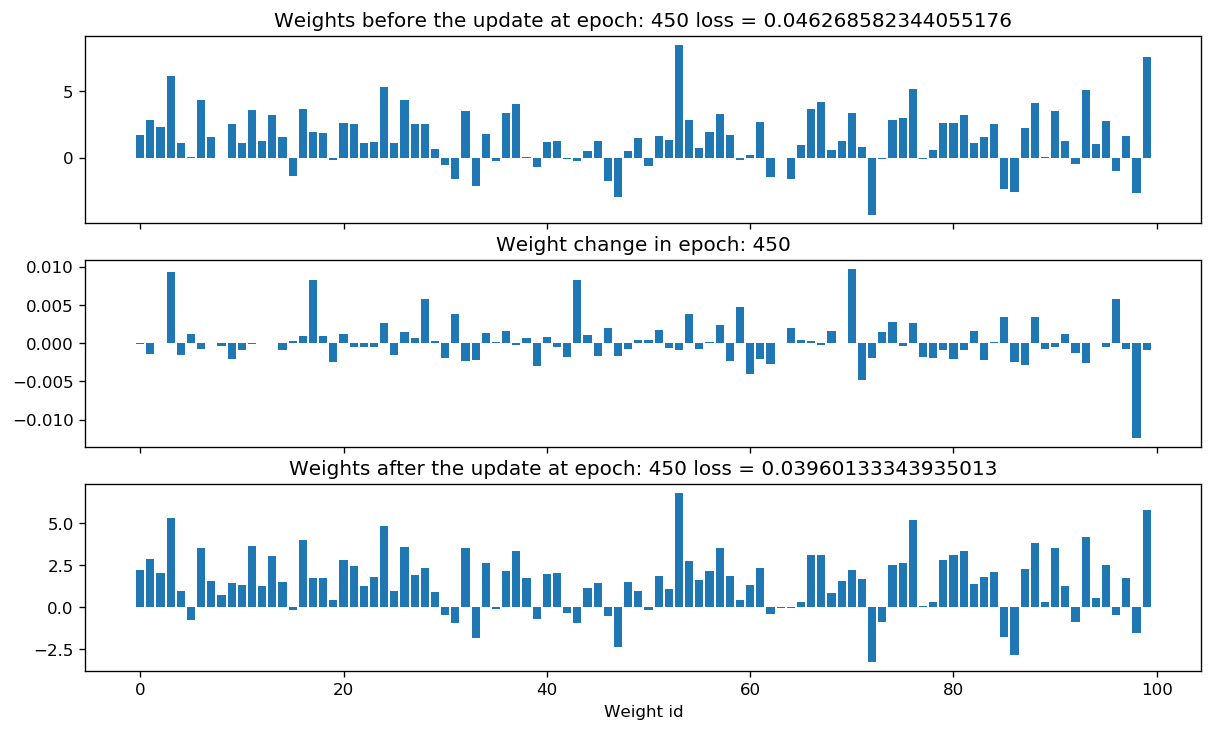

In [53]:
# Juxtaposed weight change 
def juxtaposed_weight_change(i, weight_change_rec):

    fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 7), dpi=120)
    x = np.arange(0, 100)

    axs[0].bar(x, weight_rec_2[i-1])
    axs[0].set_title("Weights before the update at epoch: " + str(i) + " loss = " + str(loss_rec_2[i]))
    axs[1].bar(x, weight_change_rec[i])
    axs[1].set_title("Weight change in epoch: " + str(i))
    axs[2].bar(x, weight_rec[i])
    axs[2].set_title("Weights after the update at epoch: " + str(i) + " loss = " + str(loss_rec_2[i+1]))

    axs[2].set_xlabel("Weight id")
    fig.show()

i = 450
juxtaposed_weight_change(i, weight_change_rec_2)


C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


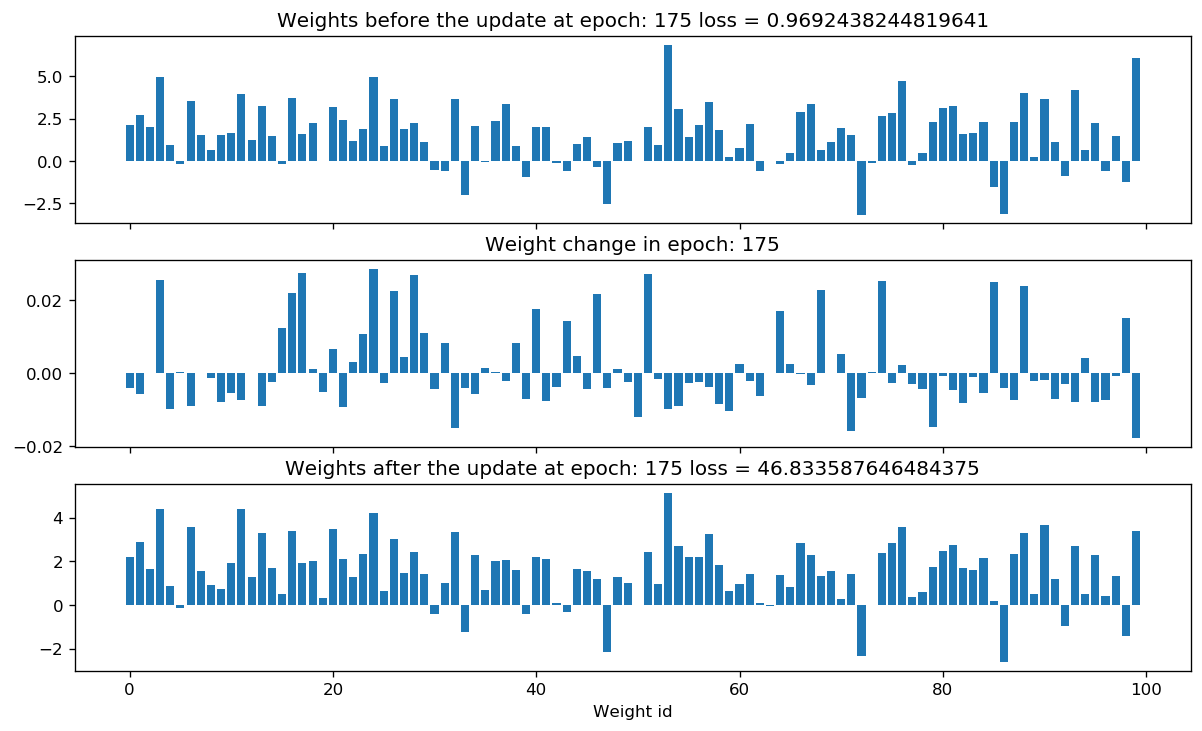

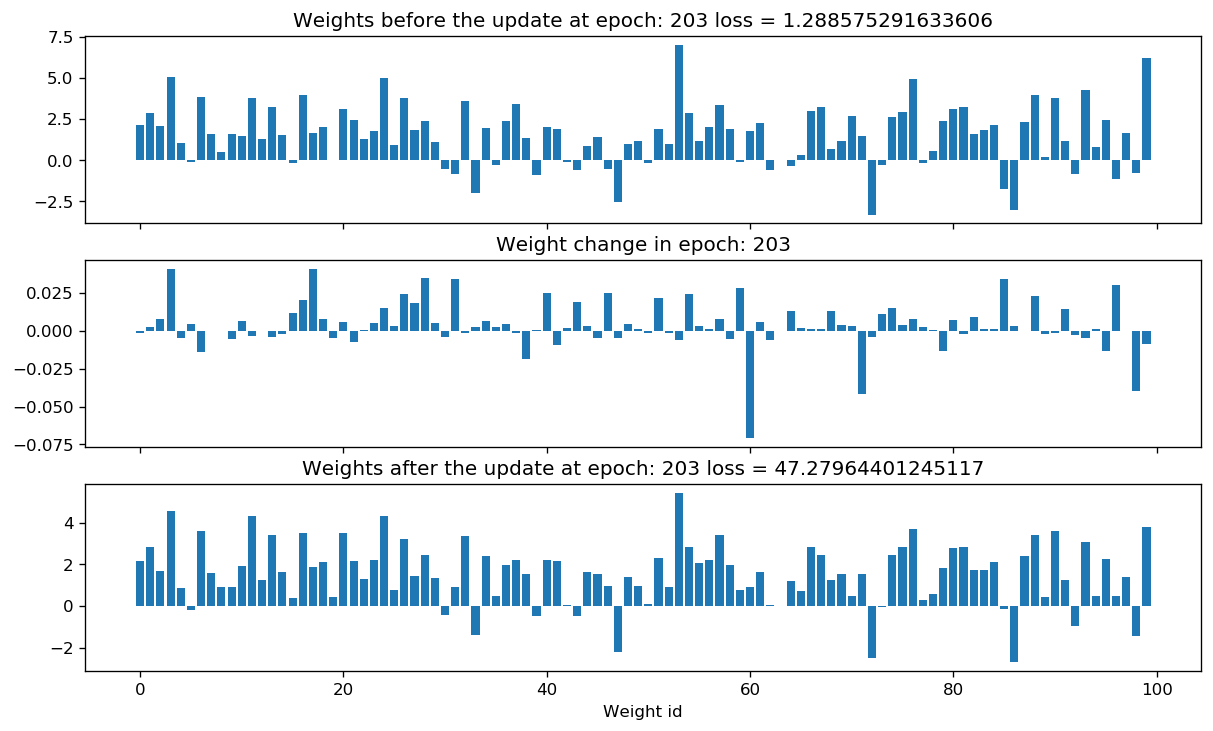

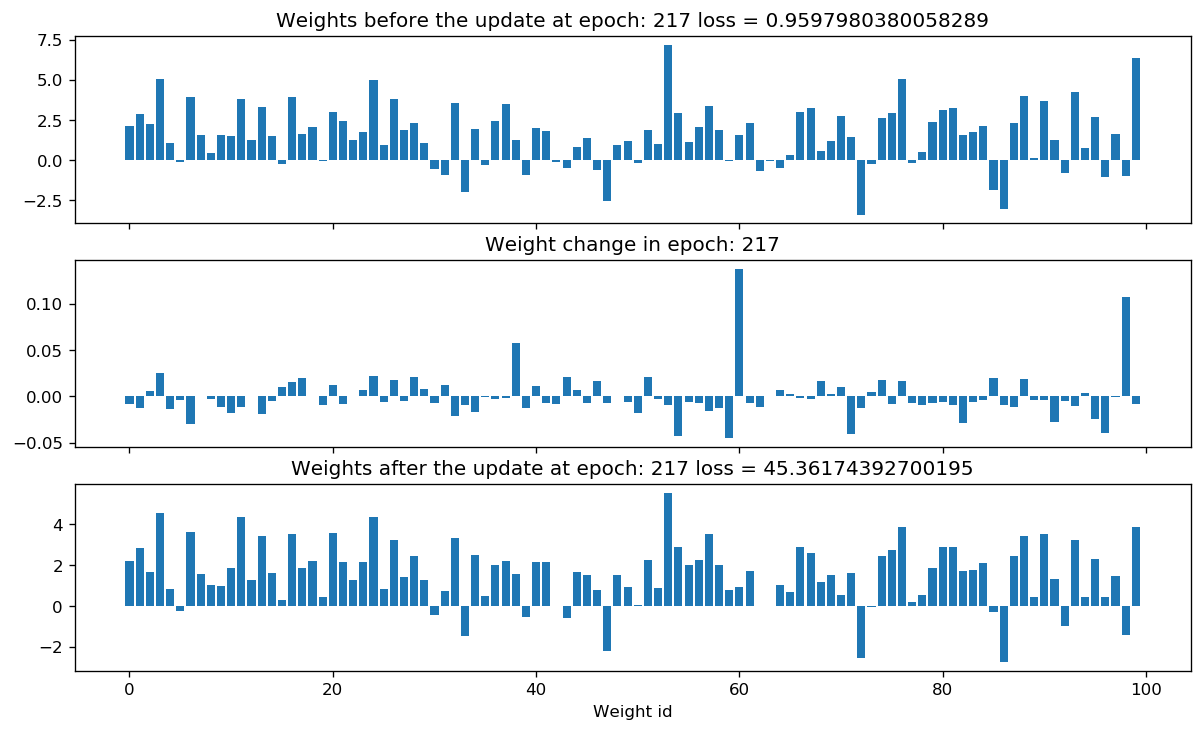

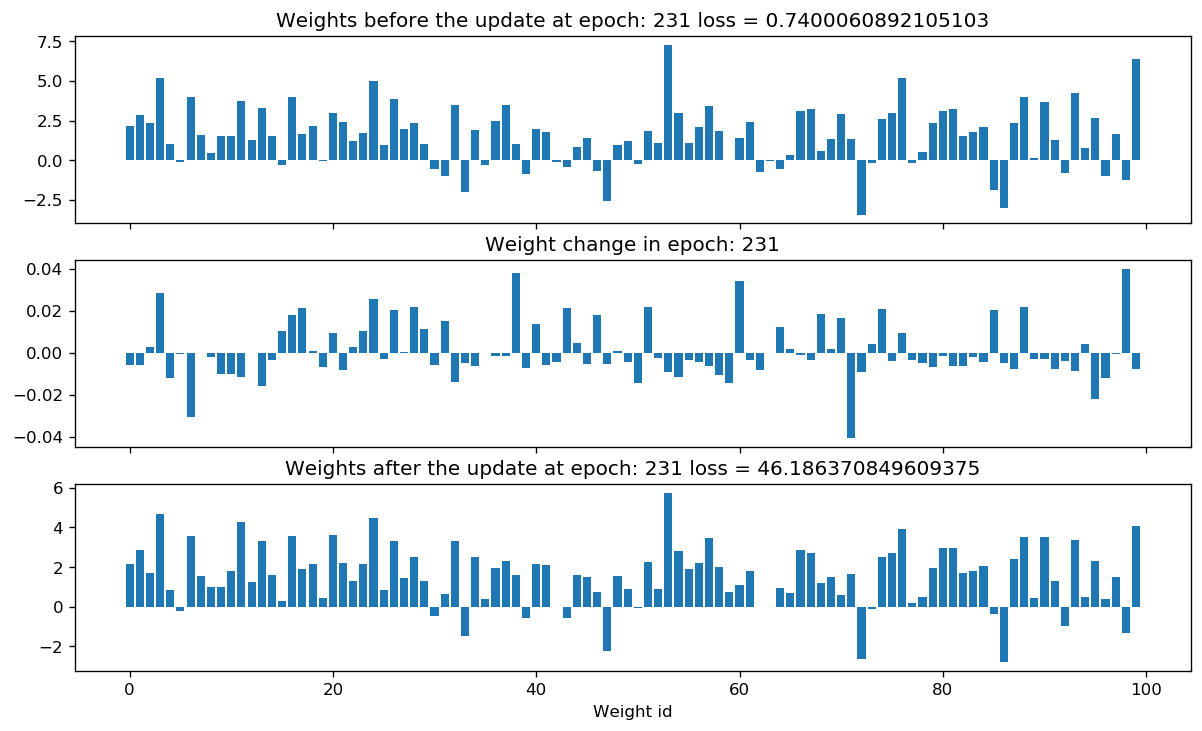

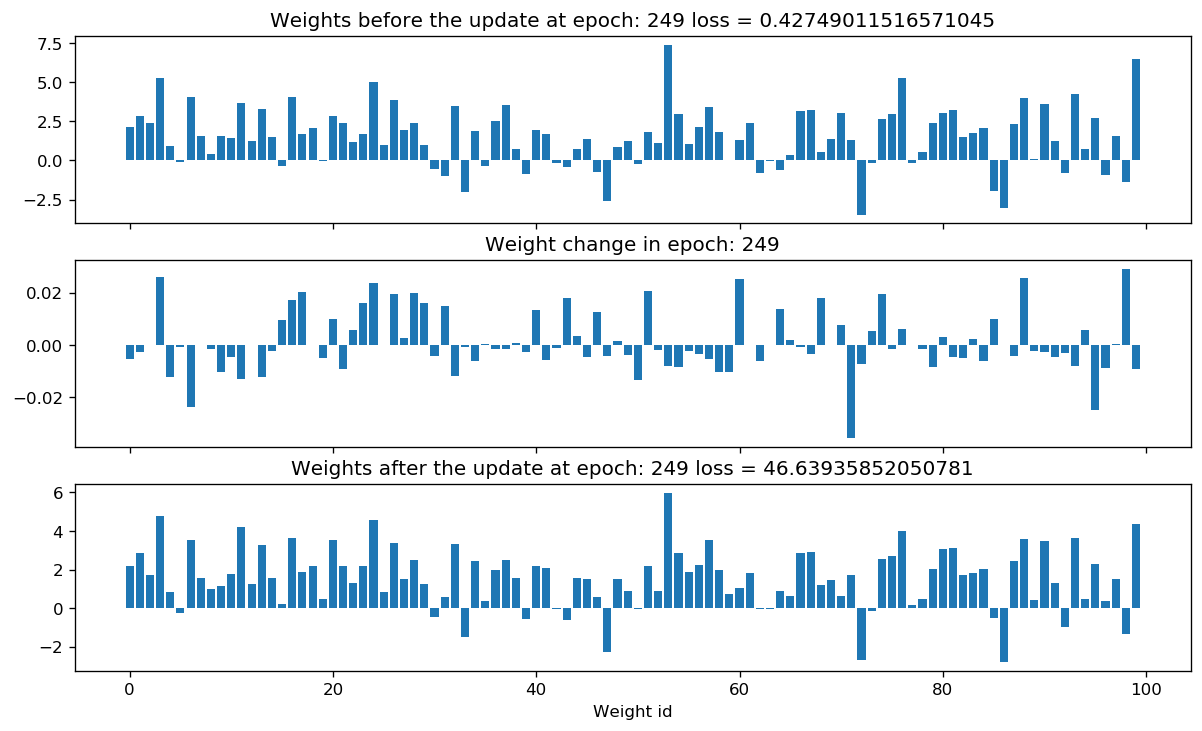

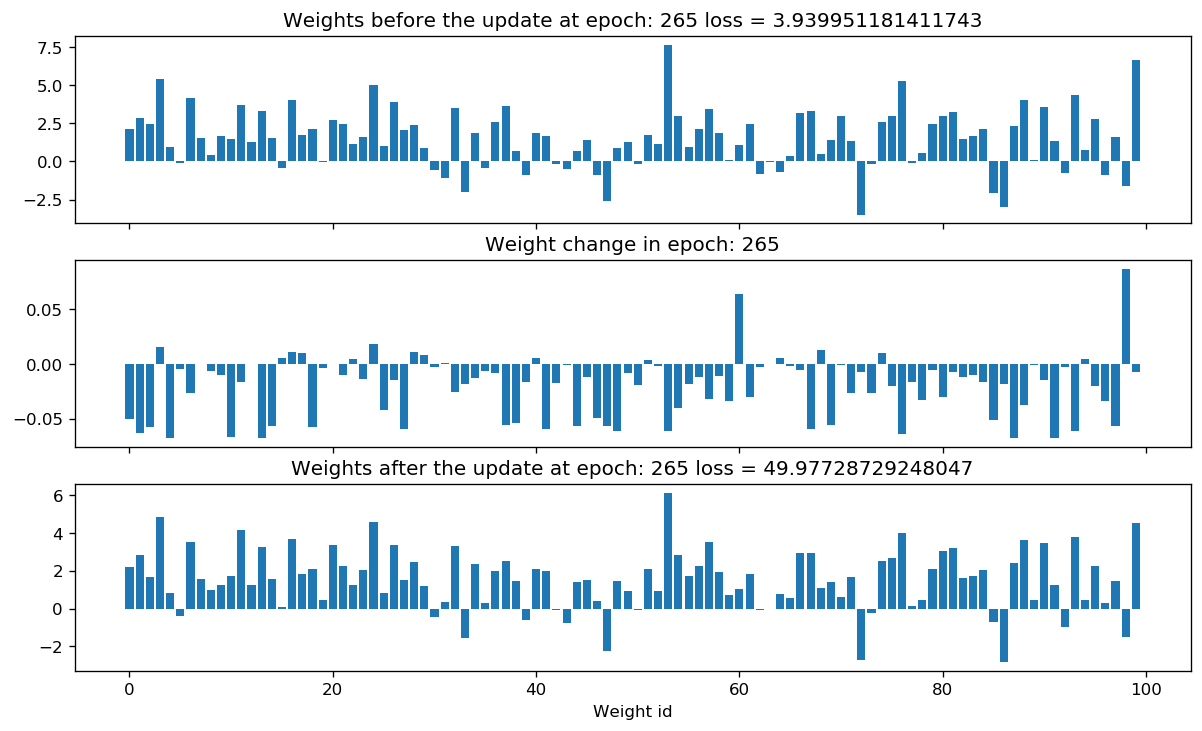

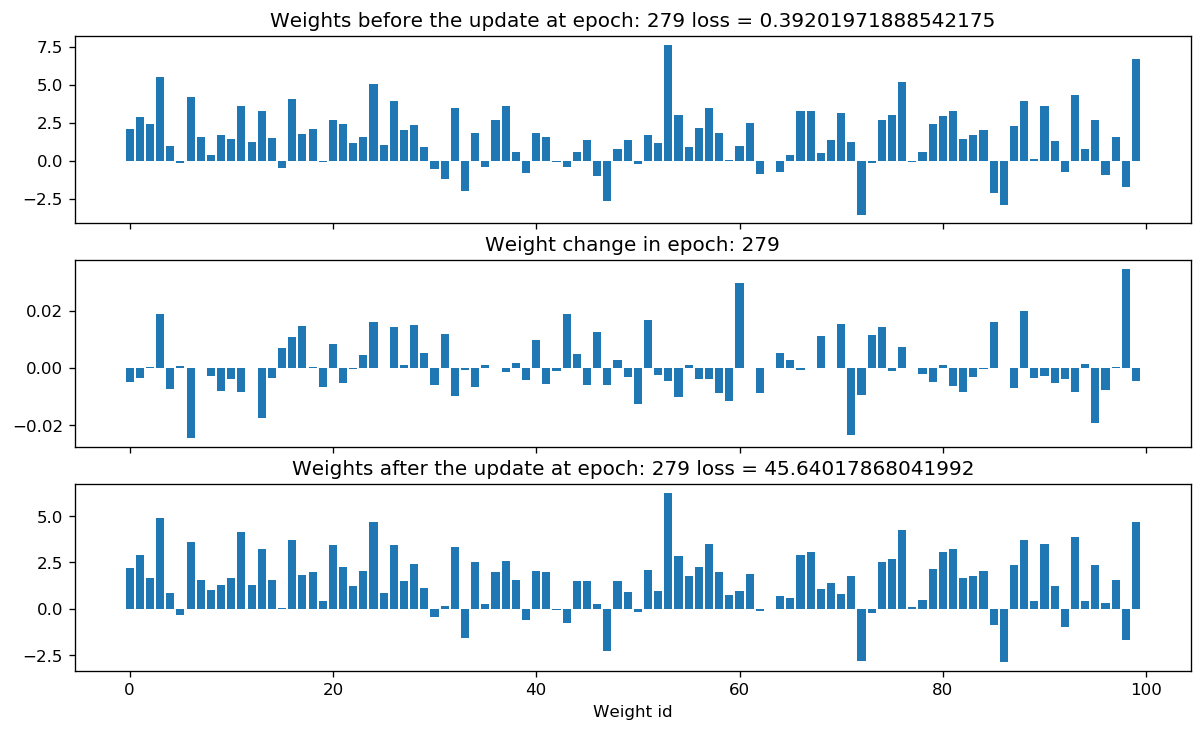

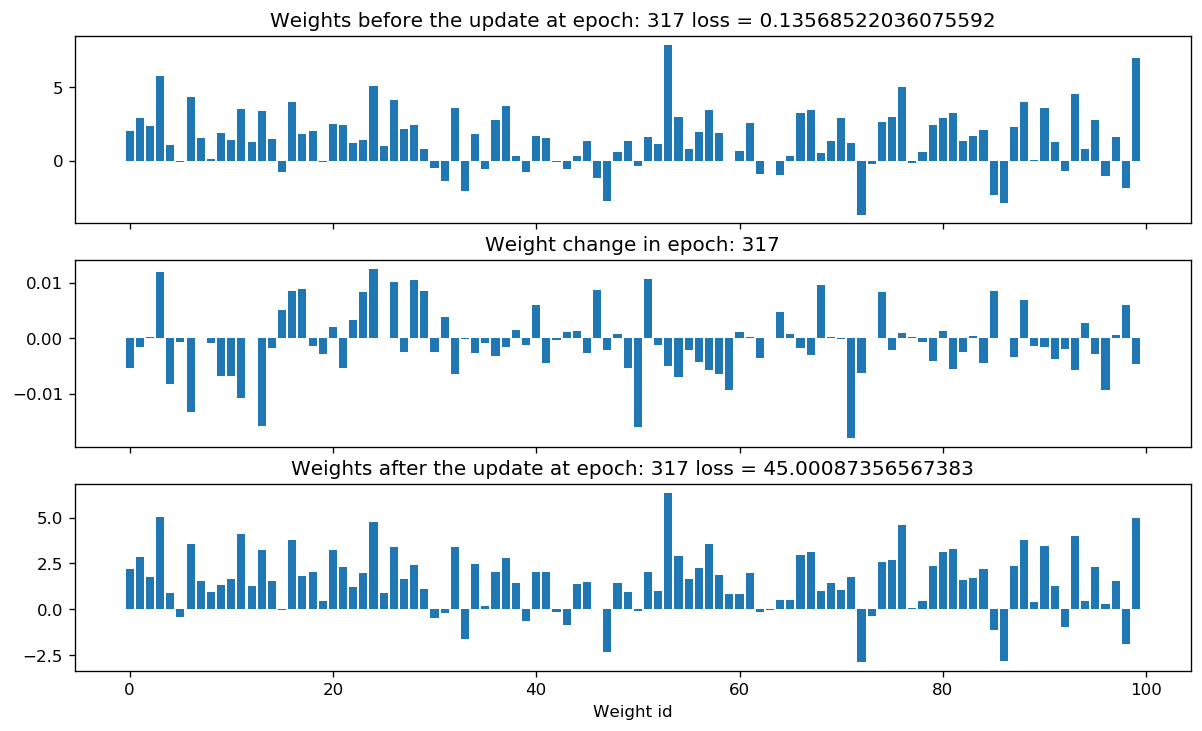

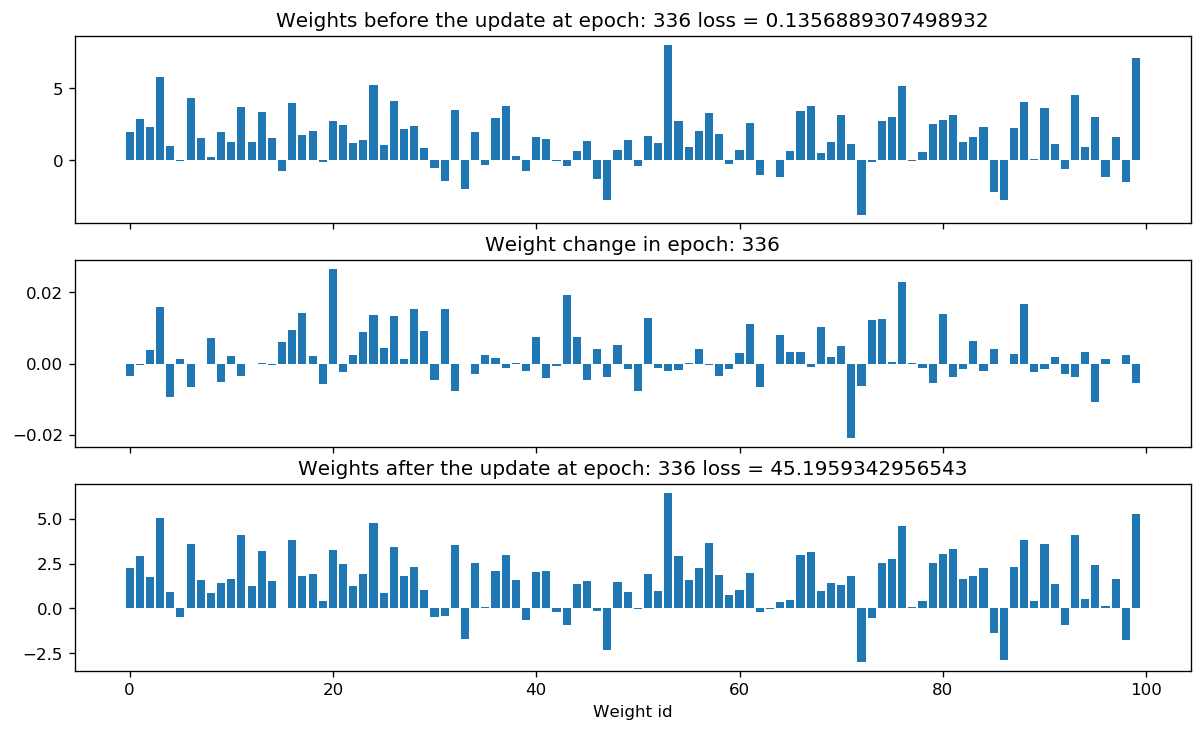

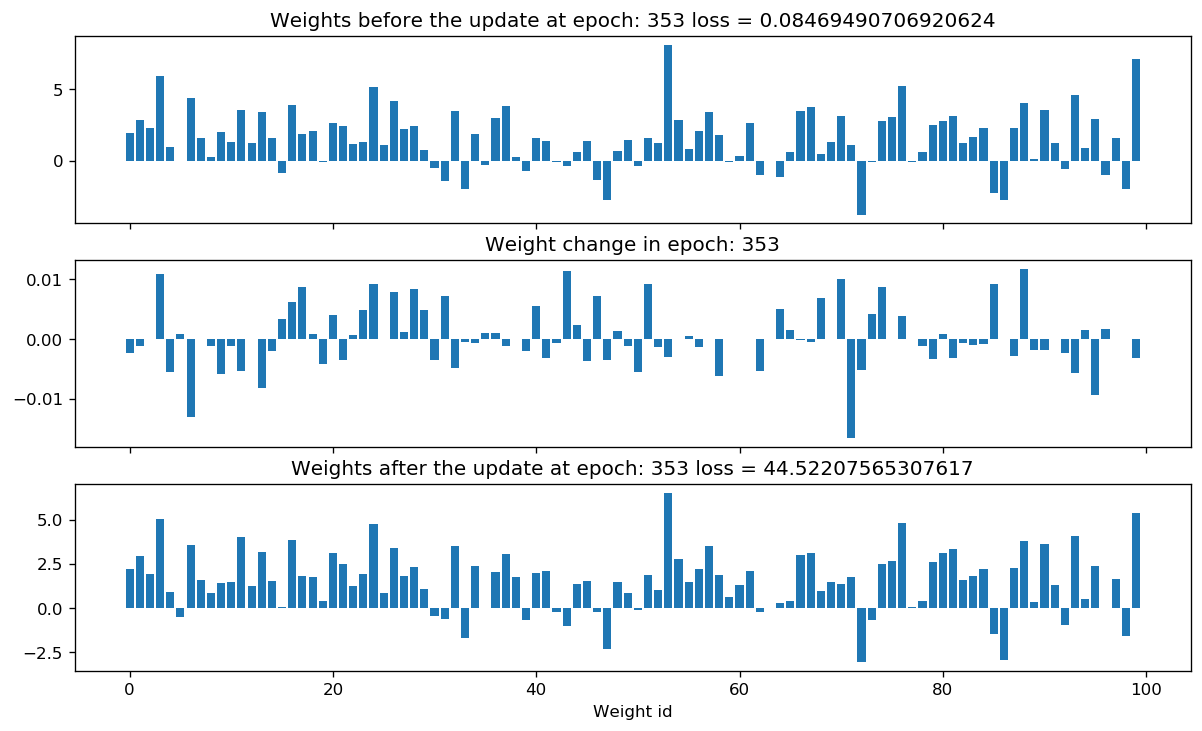

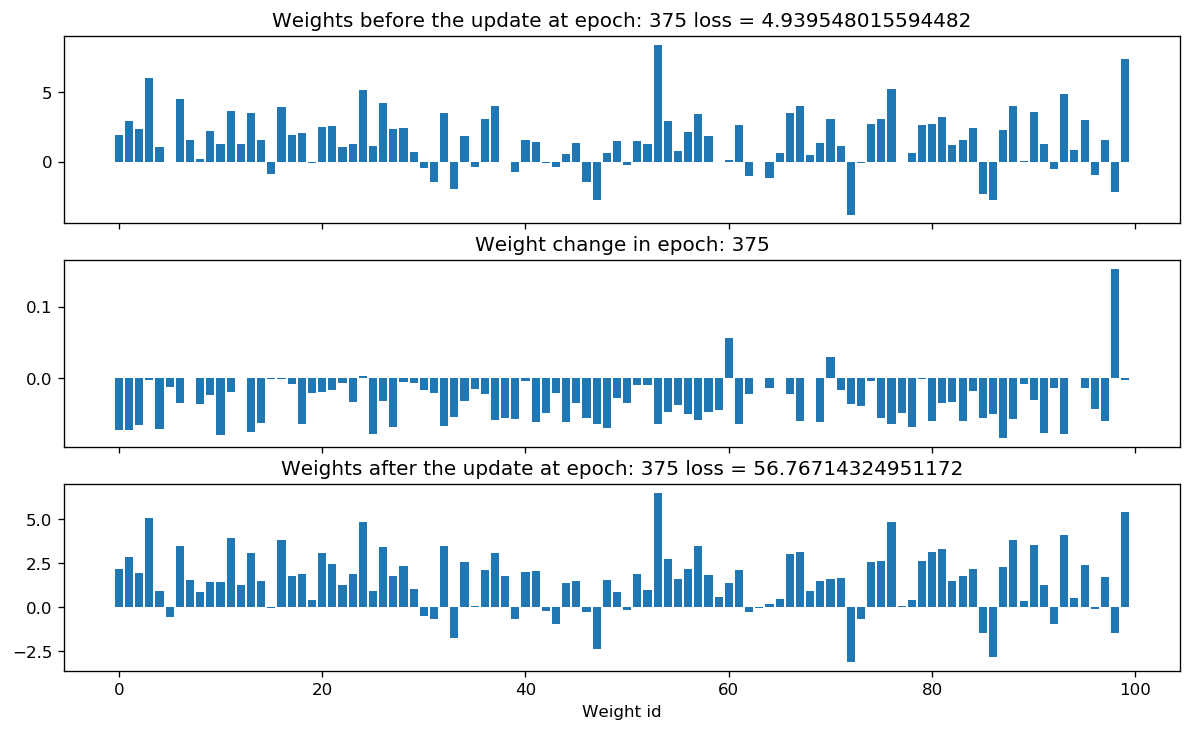

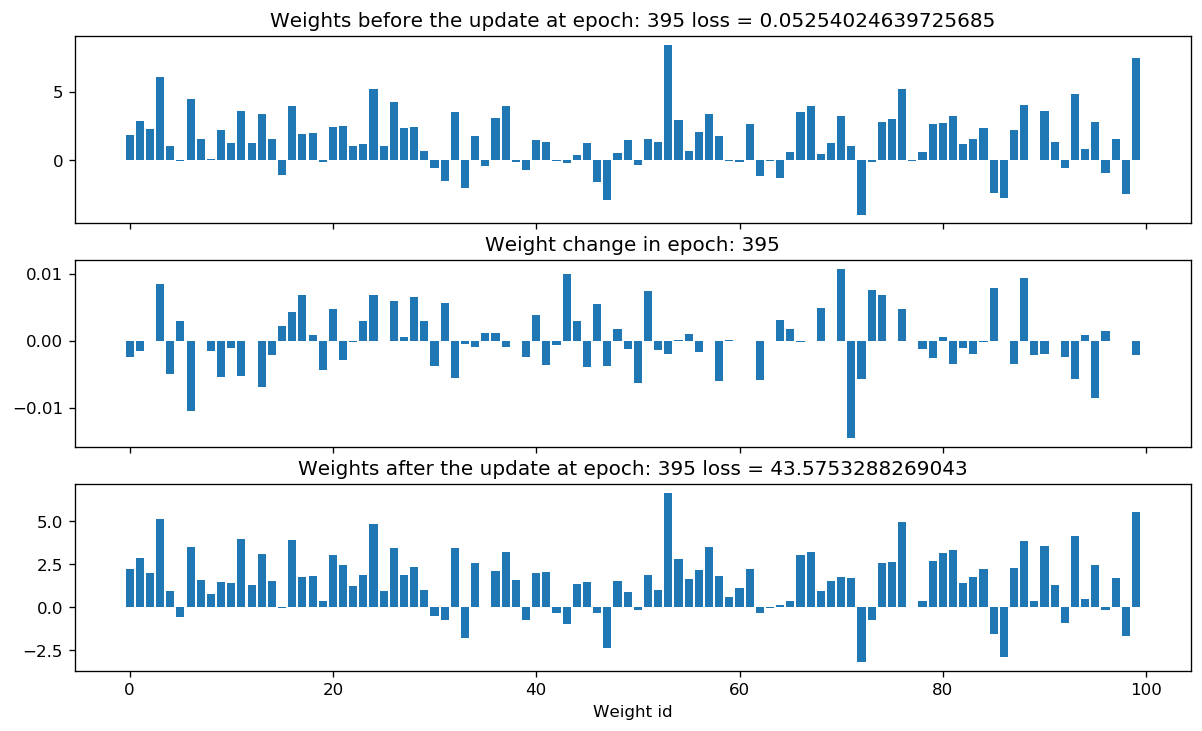

In [63]:
for i in overshoot_indices_2:
    juxtaposed_weight_change(i, weight_change_rec_2)

### Spike Train Change


torch.Size([1000, 5000])


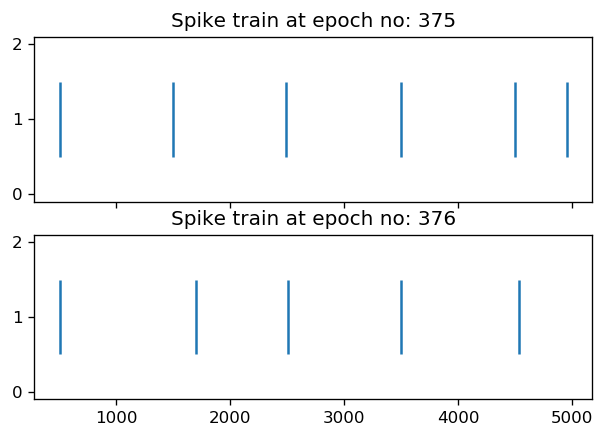

In [55]:
print(spk_rec_2.shape)
def juxtapose_spk_trains(i, j, spk_rec):
    """ Plot two spike trains at given two epochs."""

    fig, axs = plt.subplots(2, 1, sharex=True, dpi=120)

    positions = np.arange(0, 5000)
    spike_positions = positions[spk_rec[i] == 1]
    # plt.figure()
    axs[0].eventplot(spike_positions)
    axs[0].set_title("Spike train at epoch no: " + str(i))

    spike_positions = positions[spk_rec[j] == 1]
    # plt.figure(dpi=100)
    axs[1].eventplot(spike_positions)
    axs[1].set_title("Spike train at epoch no: " + str(j))

juxtapose_spk_trains(375, 376, spk_rec_2)

### Learning Rate

To look at the how the average learning rate evolves over all epochs

Text(0.5, 0, 'Epochs')

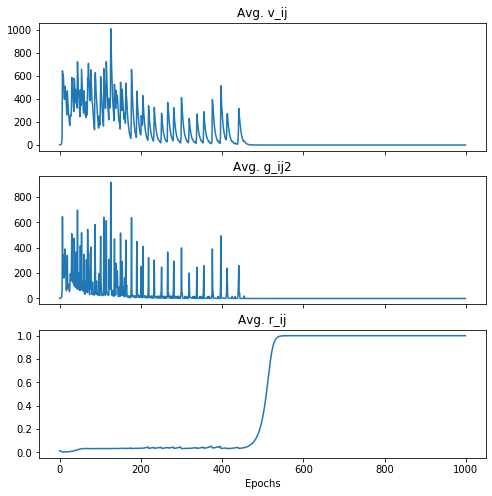

In [37]:
#print(v_ij_rec_2.shape)
avg_v_ij_rec_2 = torch.mean(v_ij_rec_2, dim=0) # shape: (1, 1000)
avg_g_ij_rec_2 = torch.mean(g_ij2_rec_2, dim=0) # shape: (1, 1000)
avg_r_ij_rec_2 = torch.mean(r_ij_rec_2, dim=0)
#print(avg_v_ij_rec_2.shape)

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(8,8))

axs[0].plot(avg_v_ij_rec_2.flatten())
axs[0].set_title("Avg. v_ij")

axs[1].plot(avg_g_ij_rec_2.flatten())
axs[1].set_title("Avg. g_ij2")

axs[2].plot(avg_r_ij_rec_2.flatten())
axs[2].set_title("Avg. r_ij")
axs[2].set_xlabel("Epochs")


To look at how the learning rate changes for each parameter just before loss overshoots

C:\Users\divya\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


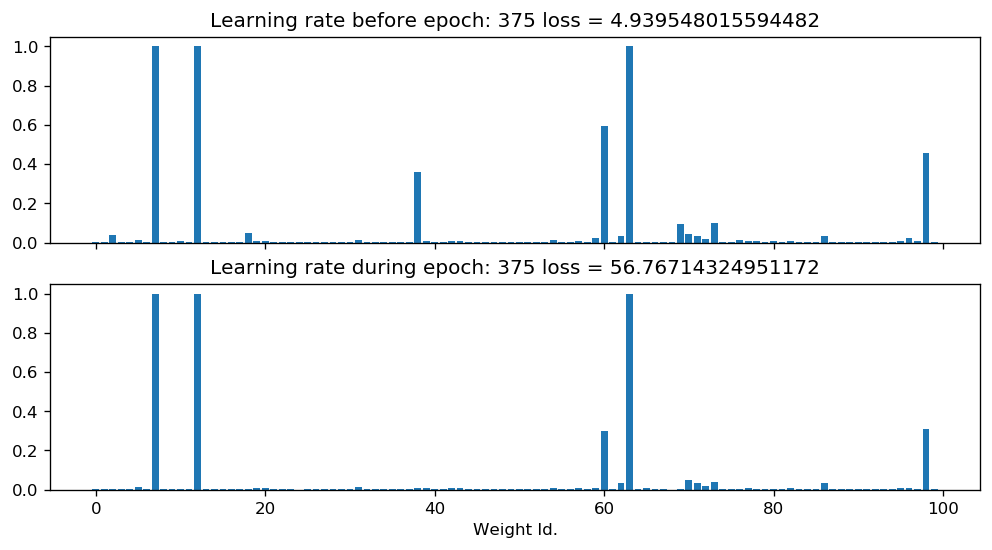

In [62]:
def juxtapose_learning_rate(i, r_ij_rec, loss_rec):

    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 5), dpi=120)
    x = np.arange(0, 100)
    axs[0].bar(x, r_ij_rec[:, :, i-1].flatten())
    axs[0].set_title("Learning rate before epoch: " + str(i) + " loss = " + str(loss_rec[i]))

    axs[1].bar(x, r_ij_rec[:, :, i].flatten())
    axs[1].set_title("Learning rate during epoch: " + str(i) + " loss = " + str(loss_rec[i+1]))
    axs[1].set_xlabel("Weight Id.")
    fig.show()

i = 375
juxtapose_learning_rate(i, r_ij_rec_2, loss_rec_2)